In [1]:
import numpy as np
import pandas as pd

### Reading the dataset

In [3]:
boston = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

# Display the first few rows of the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Data Preprocessing

In [4]:
X = boston[['RM', 'CRIM', 'ZN', 'INDUS', 'NOX']]  # for simplicity, we start with only these feature
y = boston['MEDV']

In [7]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split the data and fit a linear regression model

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Fit a linear regression model
# <write your code here>

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute the r2 score on the test data
# <write your code here>
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)



In [11]:
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Cross-Validation MSE:", -cv_scores.mean())

Cross-Validation MSE: 37.3795590303101


### Plot the learning curve

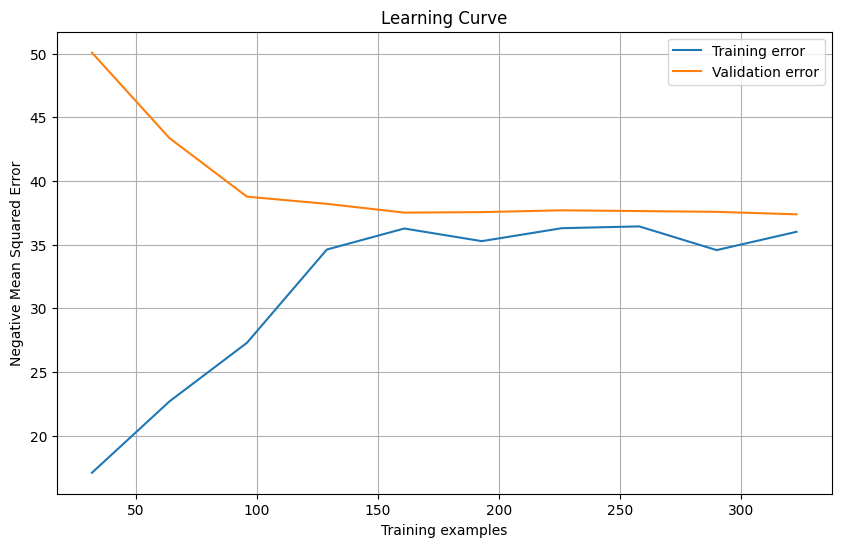

In [13]:
# Plot the learning curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt


train_sizes, train_scores, test_scores = learning_curve(estimator=model,X=X_train, y=y_train, train_sizes=np.linspace(0.1,1.0,10), scoring='neg_mean_squared_error')

train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, test_scores_mean, label='Validation error')
plt.xlabel('Training examples')
plt.ylabel('Negative Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()
# <write your code here>